# Final exam 2015

Set up the environment.

In [1]:
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

sns.set_context('talk')
pd.set_option('float_format', '{:6.2f}'.format)

%matplotlib inline

## Q1 (15 points). Load data into Python

### Q1.1 (3 points)

- Print the list of files contained in the zip file.

In [2]:
path = 'rusreg.zip'
zf = zipfile.ZipFile(path)
files = zf.namelist()

print(files)

['rusreg.dta', 'var_info_rusreg.xls']


### Q1.2 (3 points)

- Load Stata file into Pandas DataFrame.
- Load only the following variables: 'id', 'year', 'birthcoeff', 'divor\_per1000mar', 'unempl\_level', 'shconexphouse\_alco', 'avertemp\_jul', 'avertemp\_jan', and all that start with 'shaaempl\_'.
- Print number of rows and columns in the dataset.
- Print types of each variable in the dataset.

The result of this question is saved in 'exam_data.hdf' under 'rawdata' key.

In [3]:
idv = ['id', 'year']

population = ['territory', 'densitypop', 'cities',
              'population', 'population_urban', 'population_rural',
              'wom_per_thmen']

life = ['birthcoeff', 'mortcoeff',
        'lifeexp_whole', 'lifeexp_m', 'lifeexp_w',
        'divor_per1000mar',
        'unempl_level', 'dissert_total', 'pc_internet', 'cpi_food']

migration = ['migrinterreg_in', 'migrinterreg_out']

weather = ['avertemp_jan', 'avertemp_jul', 'averprec_jan', 'averprec_jul']

shaaempl = ['shaaempl_indus', 'shaaempl_agri', 'shaaempl_forest',
            'shaaempl_constr', 'shaaempl_trans', 'shaaempl_comm',
            'shaaempl_trade', 'shaaempl_house', 'shaaempl_educ',
            'shaaempl_health', 'shaaempl_culture', 'shaaempl_science',
            'shaaempl_other']

exp_shares = ['shconexphouse_food', 'shconexphouse_nfood',
              'shconexphouse_alco', 'shconexphouse_serv']

athletics = ['athl_stadium', 'athl_playgr', 'athl_gimnas', 'athl_swimpool']

columns = idv + population + life + migration + weather + shaaempl + exp_shares + athletics

columns = idv + ['birthcoeff', 'divor_per1000mar',
                 'unempl_level', 'shconexphouse_alco',
                 'avertemp_jul', 'avertemp_jan'] + shaaempl

raw = pd.read_stata(zf.open(files[0]), columns=columns)

raw.to_hdf('exam_data.hdf', key='rawdata')

print(raw.shape)
print(raw.dtypes)

(2268, 21)
id                    float32
year                    int16
birthcoeff            float64
divor_per1000mar      float64
unempl_level          float64
shconexphouse_alco    float64
avertemp_jul          float64
avertemp_jan          float64
shaaempl_indus        float64
shaaempl_agri         float64
shaaempl_forest       float64
shaaempl_constr       float64
shaaempl_trans        float64
shaaempl_comm         float64
shaaempl_trade        float64
shaaempl_house        float64
shaaempl_educ         float64
shaaempl_health       float64
shaaempl_culture      float64
shaaempl_science      float64
shaaempl_other        float64
dtype: object


### Q1.3  (4 points)

- Convert 'id' variable to integer.
- Convert 'year' variable to datetime.
- Print first five rows of these two variables only.

The result of this question is saved in 'exam_data.hdf' under 'maindata' key.

In [4]:
data = raw.copy()
data['id'] = data['id'].astype(int)
data['year'] = data['year'].apply(lambda x: pd.to_datetime(x, format='%Y'))

data.to_hdf('exam_data.hdf', key='maindata')

print(data[['id', 'year']].head())

     id       year
0  1000 1970-01-01
1  1001 1970-01-01
2    31 1970-01-01
3    32 1970-01-01
4    33 1970-01-01


### Q1.4 (5 points)

- Load 'id variables' sheet from the Excel file into Pandas DataFrame.
- Set 'id' variable as an index column.
- Convert all capital letters to lower case in all column names.
- Replace all missing values with integer '-999'.
- Covert all non-object columns to integers.
- Print shape of the dataset, column types, and first five rows.

The result of this question is saved in 'exam_data.hdf' under 'idvars' key.

In [5]:
idvars = pd.read_excel(zf.open(files[1]),
                       sheetname='id variables',
                       index_col=0)
idvars.columns = [col.lower() for col in idvars.columns]
idvars.index.name = idvars.index.name.lower()
idvars = idvars.fillna(-999)
intcols = idvars.columns.drop(['region_eng', 'region_rus'])
idvars[intcols] = idvars[intcols].astype(int)

idvars.to_hdf('exam_data.hdf', key='idvars')

print(idvars.shape)
print(idvars.dtypes)
print(idvars.head())

(108, 8)
ter            int64
region_eng    object
rayon          int64
fedokrug       int64
fed_id         int64
row_fed        int64
row_rayon      int64
region_rus    object
dtype: object
       ter             region_eng  rayon  fedokrug  fed_id  row_fed  \
id                                                                    
1000  -999     Russian Federation   -999      -999       0        1   
1001  -999  Central Federal Okrug   -999      -999       1        2   
31    1114        Belgorod oblast    105      1001     101        3   
32    1115         Bryansk oblast    103      1001     102        4   
33    1117        Vladimir oblast    103      1001     103        5   

      row_rayon                     region_rus  
id                                              
1000          1           Российская федерация  
1001       -999  Центральный федеральный округ  
31           35           Белгородская область  
32           15               Брянская область  
33           16  

## Q2 (10 points). Divorce rate and alcohol consumption

- Draw scatter plot of average divorce rate ('divor_per1000mar') across alcohol consumption share ('shconexphouse_alco'). Note that the average is taken over time and over micro ('id' < 100) regions.
- Draw linear regression line with confidence intervals.
- Draw univariate histograms and kernel densities on the sides.

The dataset for plotting is saved in 'exam_data.hdf' under 'q2' key.

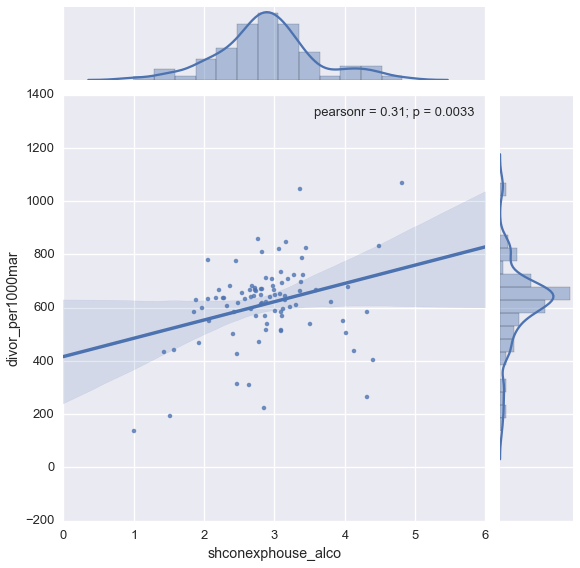

In [6]:
df = data.set_index('id')
df = df.join(idvars['region_eng'])
df = df[df.index < 100]
df = df.groupby(level='id').mean()

df.to_hdf('exam_data.hdf', key='q2')

sns.jointplot(kind='reg', x='shconexphouse_alco', y='divor_per1000mar', data=df, size=8)
plt.show()

## Q3 (15 points). Birth rate and climate.

- Draw scatter plots of average birth rate ('birthcoeff') across average July and January tempreatures ('avertemp_jul', 'avertemp_jan'). Note that the average is taken over time and over micro ('id' < 100) regions. Leave only data on micro regions ('id' < 100).
- Sort corresponding data by birth rate. Print first five and last five observations in one table.

The dataset for plotting is saved in 'exam_data.hdf' under 'q3' key.

region_eng
St. Petersburg city                     7.52
Tula oblast                             7.60
Moskow oblast                           7.71
Leningrad oblast                        7.73
Ivanovo oblast                          8.06
o/w Aginsk Buryat autonomous okrug     16.93
Tuva republic                          19.19
Ingush republic                        19.73
Dagestan republic                      20.62
Chechnya republic                      23.93
Name: birthcoeff, dtype: float64


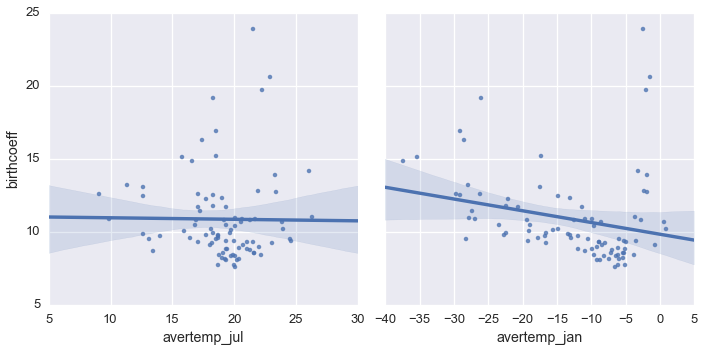

In [7]:
yvar = 'birthcoeff'
xvars = ['avertemp_jan', 'avertemp_jul']
cols = xvars + [yvar]
df = data.groupby('id')[cols].mean()
df = df.join(idvars['region_eng'])
df.reset_index(inplace=True)
df = df[df['id'] < 100]
df.set_index('region_eng', inplace=True)
df.sort_values(by=yvar, inplace=True)

print(pd.concat([df.head(), df.tail()])[yvar])

df.to_hdf('exam_data.hdf', key='q3')

sns.pairplot(x_vars=['avertemp_jul', 'avertemp_jan'], y_vars=['birthcoeff'],
             data=df, kind='reg', size=5)
plt.show()

## Q4 (20 points). Unemployment and divorce

- Plot average unemployment level ('unempl_level') and divorce rate ('divor_per1000mar') for each federal macro region ('fedokrug') over time ('year'). Note that the averaging is done across micro regions inside each macroregion ('id' > 1000). Leave only years from 1994 up to 2003.
- Save the plot in pdf format.

The dataset for plotting is saved in 'exam_data.hdf' under 'q4' key.

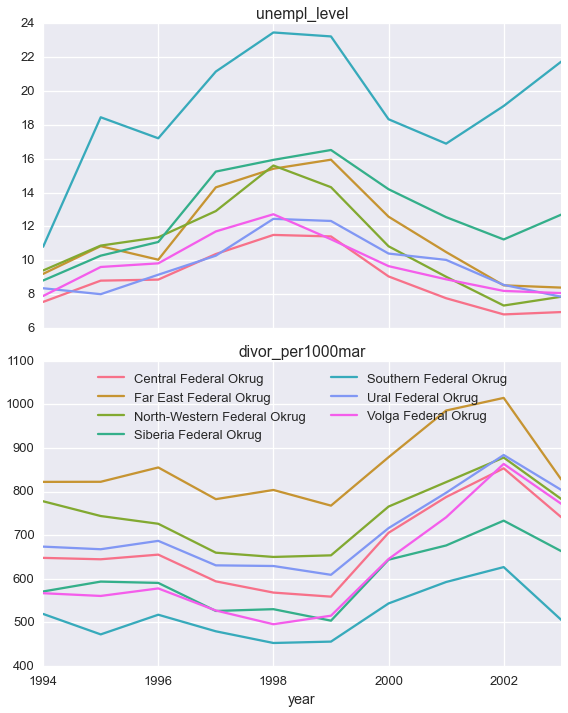

In [8]:
df = data.copy()
df = pd.merge(df, idvars, left_on='id', right_index=True)
df = df.groupby(['fedokrug', 'year'], as_index=False).mean()
df = df[df['fedokrug'] > 1000]
df = pd.merge(df, idvars, left_on='fedokrug', right_index=True)
df.reset_index(inplace=True)
df.set_index(['region_eng', 'year'], inplace=True)
df = df.unstack('region_eng')
df = df['1994':'2003']

df.to_hdf('exam_data.hdf', key='q4')

with sns.color_palette("husl", 7):
    names = ['unempl_level', 'divor_per1000mar']
    fig, axes = plt.subplots(nrows=len(names), ncols=1, figsize=(8, 10), sharex=True)
    for name, ax in zip(names, axes):
        df[name].plot(ax=ax)
        ax.set_title(name)
    axes[0].legend().set_visible(False)
    axes[1].legend(loc='upper center', ncol=2)
    plt.tight_layout()
    plt.savefig('plot.pdf')
    plt.show()

## Q5. Changes in employment composition

Draw standard deviation of employment share by industry and macro region ('id' > 1000) across time.

### Q5.1 (10 points)

- Create MultiIndex from 'id' and 'year'.
- Leave only those columns that start with 'shaaempl\_'.
- Remove 'shaaempl\_' from column names.
- Pivot DataFrame into Series called 'shaaempl' such that MultiIndex has another level called 'industry'.
- Print first five rows.

The result is saved in 'exam_data.hdf' under 'q51' key.

In [9]:
empl = data.set_index(idv)[shaaempl].dropna()
empl.columns = empl.columns.map(lambda x: x[9:])
empl = empl.stack()
names = list(empl.index.names)
names[-1] = 'industry'
empl.index.names = names
empl.name = 'shaaempl'

empl.to_hdf('exam_data.hdf', key='q51')

print(empl.head())

id    year        industry
1000  1995-01-01  indus       25.80
                  agri        14.70
                  forest       0.40
                  constr       9.30
                  trans        6.60
Name: shaaempl, dtype: float64


### Q5.2 (30 points)

- Merge the data with 'idvars'.
- Compute standard deviation of employment share across all micro regions by federal macro region ('id' > 1000) and by industry.
- Merge the result with 'idvars' again to obtain names of macro regions instead of their ids.
- Pivot DataFrame so that it has regions in rows and industries in columns.
- Remove ' Federal Okrug' from the name of a region.
- Sort rows 'agri' column.
- Sort columns by 'Central' region.
- Save the result as Excel and HTML file with two digits after the dot.
- Print first five rows.
- Draw bar plot.

The data for plotting is saved in 'exam_data.hdf' under 'q52' key.

industry        agri  indus  trade  constr  science  other  house  health  \
Ural            7.98   6.60   2.01    4.18     0.60   1.64   1.19    0.67   
Central         6.65   5.30   3.17    2.22     2.11   2.04   1.17    0.92   
Southern        6.42   4.58   4.05    2.67     0.31   2.62   0.87    2.04   
Siberia         6.23   6.83   2.47    1.88     0.85   1.64   0.97    3.18   
North-Western   5.15   3.47   3.04    2.03     1.57   1.56   0.83    1.08   

industry        educ  trans  forest  culture   comm  
Ural            0.44   2.42    0.17     0.14   0.22  
Central         0.69   0.54    0.32     0.26   0.16  
Southern        1.13   1.39    0.23     0.51   0.30  
Siberia         1.27   2.10    0.48     0.86   0.23  
North-Western   0.83   1.87    0.42     0.23   0.29  


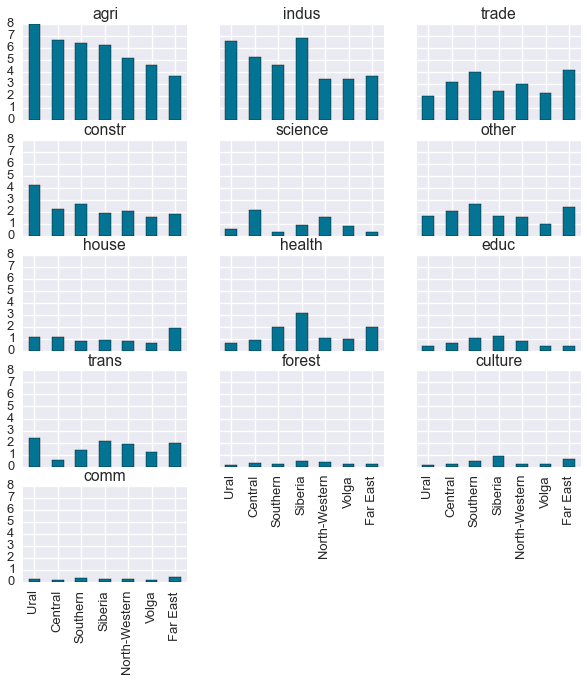

In [10]:
df = pd.DataFrame(empl).reset_index()
df = pd.merge(df, idvars, left_on='id', right_index=True)
df = df.groupby(['fedokrug', 'industry'])[['shaaempl']].std()
df = df.loc[1000:, :]
df = pd.merge(df.reset_index('fedokrug'), idvars[['region_eng']],
              left_on='fedokrug', right_index=True)
df.set_index('region_eng', append=True, inplace=True)
df = df['shaaempl'].unstack('industry')
df.index = df.index.map(lambda x: x[:-14])
df.sort_values(by='agri', ascending=False, inplace=True)
df = df.T.sort_values(by='Central', ascending=False).T
df.to_excel('data.xlsx', float_format='%.2f')
df.to_html('data.html')

df.to_hdf('exam_data.hdf', key='q52')

print(df.head())

df.plot(kind='bar', subplots=True, layout=(df.shape[1]//3+1, 3),
        figsize=(10, 10), sharex=True, sharey=True, legend=False,
        color='#047495')
plt.show()